In [1]:
#description: This program uses the Money Flow Index (MFI) to determine when to buy and sell stock

In [2]:
#Import the libraries
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [7]:
# get the data
df = pd.read_csv('Data/TSLA.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500
1,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000
2,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000
3,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000
4,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000
...,...,...,...,...,...,...,...
246,2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900
247,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700
248,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800
249,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600


In [8]:
# set the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000
...,...,...,...,...,...,...,...
2020-09-04,2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900
2020-09-08,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700
2020-09-09,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600


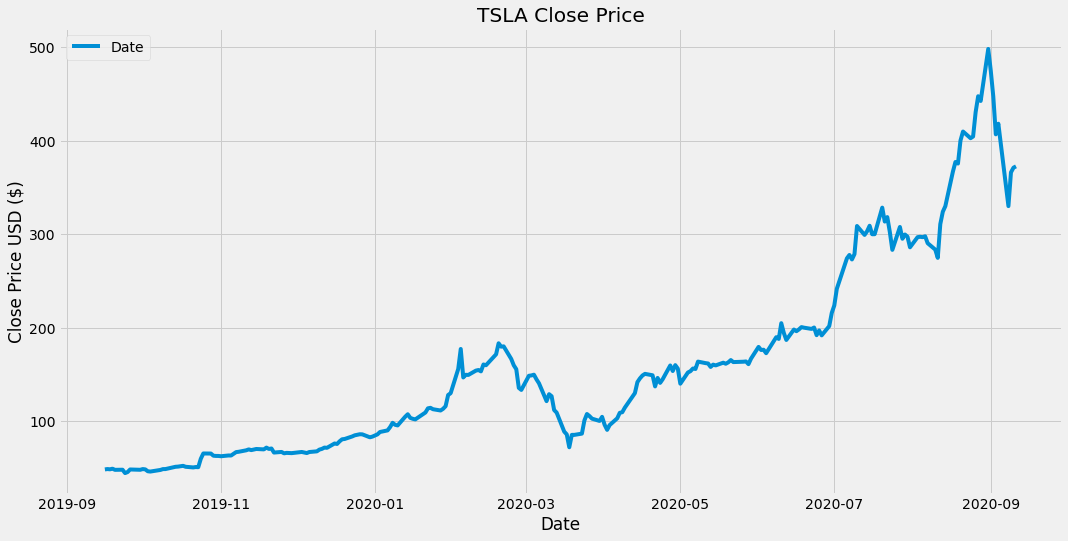

In [9]:
# visually show data
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label = 'Close Price')
plt.title('TSLA Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [10]:
# calculate the typical price
typical_price = (df['Close'] + df['High'] + df['Low']) / 3

typical_price

2019-09-16     48.760667
2019-09-17     48.717333
2019-09-18     48.935333
2019-09-19     49.292000
2019-09-20     48.382000
                 ...    
2020-09-04    406.113332
2020-09-08    342.943329
2020-09-09    358.930003
2020-09-10    376.963328
2020-09-11    371.906667
Length: 251, dtype: float64

In [11]:
# Get the period the MFI uses
period = 14

In [12]:
# calculate the money flow
money_flow = typical_price * df['Volume']

money_flow

2019-09-16    1.152727e+09
2019-09-17    9.415599e+08
2019-09-18    1.020351e+09
2019-09-19    1.181973e+09
2019-09-20    1.536854e+09
                  ...     
2020-09-04    4.480319e+10
2020-09-08    3.959819e+10
2020-09-09    2.852266e+10
2020-09-10    3.201572e+10
2020-09-11    2.249225e+10
Length: 251, dtype: float64

In [13]:
# Get all the positive and negative money flows
positive_flow = []
negative_flow = []

# Loop through the typical price
for i in range(1, len(typical_price)):
    if typical_price[i] > typical_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif typical_price[i] < typical_price[i-1]:
        negative_flow.append(money_flow[i-1])
        positive_flow.append(0)
    else:
        positive_flow.append(0)
        negative_flow.append(0)

In [14]:
# Get all the positive and negative money flows within the time period
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
    positive_mf.append( sum(positive_flow[i + 1- period : i+1]) )
for i in range(period-1, len(negative_flow)):
    negative_mf.append( sum(negative_flow[i + 1- period : i+1]) )

In [15]:
# calculate the money flow index
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf) ))

mfi

array([ 46.74987377,  52.62436351,  54.30298107,  56.03243948,
        60.96045376,  66.36540287,  71.1262775 ,  80.90520369,
        80.59306153,  79.82622582,  84.2605361 ,  78.63937433,
        84.22368239,  84.85114317,  83.47989175,  87.25335079,
        89.79818866,  76.1175789 ,  68.36257426,  69.38200656,
        65.55171834,  65.09855908,  65.94453236,  66.2932814 ,
        69.8103639 ,  74.66534609,  75.03397155,  78.22719493,
        78.70567595,  70.27921052,  65.1872965 ,  72.98464737,
        82.45826409,  74.5132403 ,  79.51010742,  73.5905572 ,
        75.5298923 ,  66.51710565,  66.57003506,  59.09594878,
        57.73618836,  56.03593532,  49.29985802,  50.88025562,
        49.35583775,  55.65491901,  57.56915552,  65.64352087,
        65.6979377 ,  72.2673894 ,  69.51020537,  83.47915964,
        83.75373219,  89.84846642,  91.26407855,  91.95197302,
        96.55591614, 100.        , 100.        ,  92.90447354,
        84.7487991 ,  85.03590447,  85.41033327,  86.47

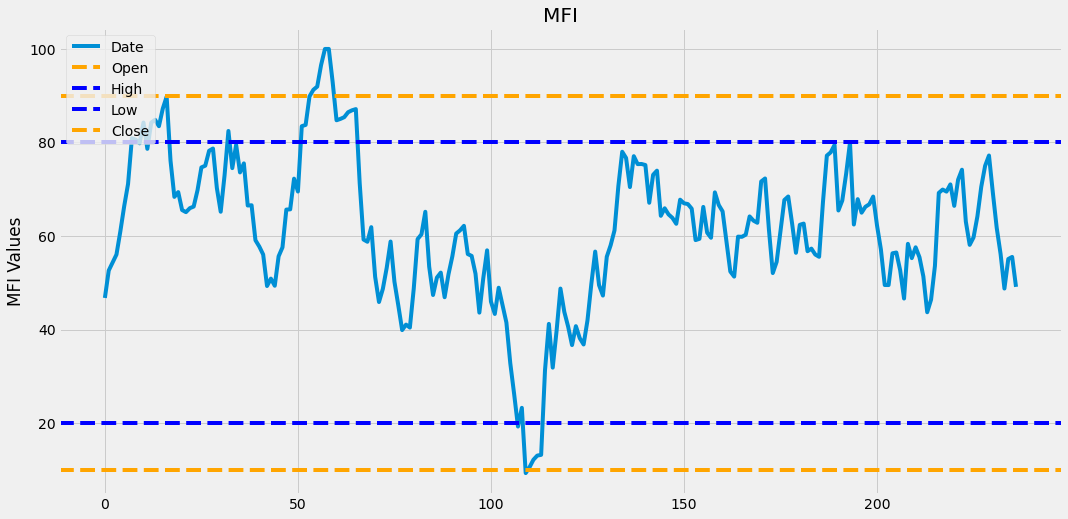

In [16]:
# Visually show the MFI
df2 = pd.DataFrame()
df2['MFI'] = mfi

# Create the plot
plt.figure(figsize=(16,8))
plt.plot(df2['MFI'], label='MFI')
plt.axhline(10, linestyle='--', color='orange')
plt.axhline(20, linestyle='--', color='blue')
plt.axhline(80, linestyle='--', color='blue')
plt.axhline(90, linestyle='--', color='orange')
plt.title('MFI')
plt.ylabel('MFI Values')
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [17]:
# Create a new dataframe
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi 

In [18]:
# Show the new DF
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,MFI
2019-10-04,2019-10-04,46.321999,46.956001,45.613998,46.285999,46.285999,39975000,46.749874
2019-10-07,2019-10-07,45.959999,47.712002,45.709999,47.543999,47.543999,40321000,52.624364
2019-10-08,2019-10-08,47.174000,48.787998,46.900002,48.009998,48.009998,43391000,54.302981
2019-10-09,2019-10-09,48.264000,49.459999,48.130001,48.905998,48.905998,34472000,56.032439
2019-10-10,2019-10-10,49.056000,49.855999,48.316002,48.948002,48.948002,31416500,60.960454
...,...,...,...,...,...,...,...,...
2020-09-04,2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900,56.184482
2020-09-08,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700,48.763214
2020-09-09,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800,55.079236
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600,55.524313


In [19]:
# Create a function to get the buy and sell signals
def get_signal(data, high, low):

    buy_signal = []
    sell_signal = []

    for i in range(len(data['MFI'])):
        if data['MFI'][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['MFI'][i] < low:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else:
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)
    
    return (buy_signal, sell_signal)

In [20]:
# Add new columns (Buy and Sell)
new_df['Buy'] = get_signal(new_df, 80, 20)[0]
new_df['Sell'] = get_signal(new_df, 80, 20)[1]

# Show them
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,MFI,Buy,Sell
2019-10-04,2019-10-04,46.321999,46.956001,45.613998,46.285999,46.285999,39975000,46.749874,NaN,NaN
2019-10-07,2019-10-07,45.959999,47.712002,45.709999,47.543999,47.543999,40321000,52.624364,NaN,NaN
2019-10-08,2019-10-08,47.174000,48.787998,46.900002,48.009998,48.009998,43391000,54.302981,NaN,NaN
2019-10-09,2019-10-09,48.264000,49.459999,48.130001,48.905998,48.905998,34472000,56.032439,NaN,NaN
2019-10-10,2019-10-10,49.056000,49.855999,48.316002,48.948002,48.948002,31416500,60.960454,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-09-04,2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900,56.184482,NaN,NaN
2020-09-08,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700,48.763214,NaN,NaN
2020-09-09,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800,55.079236,NaN,NaN
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600,55.524313,NaN,NaN


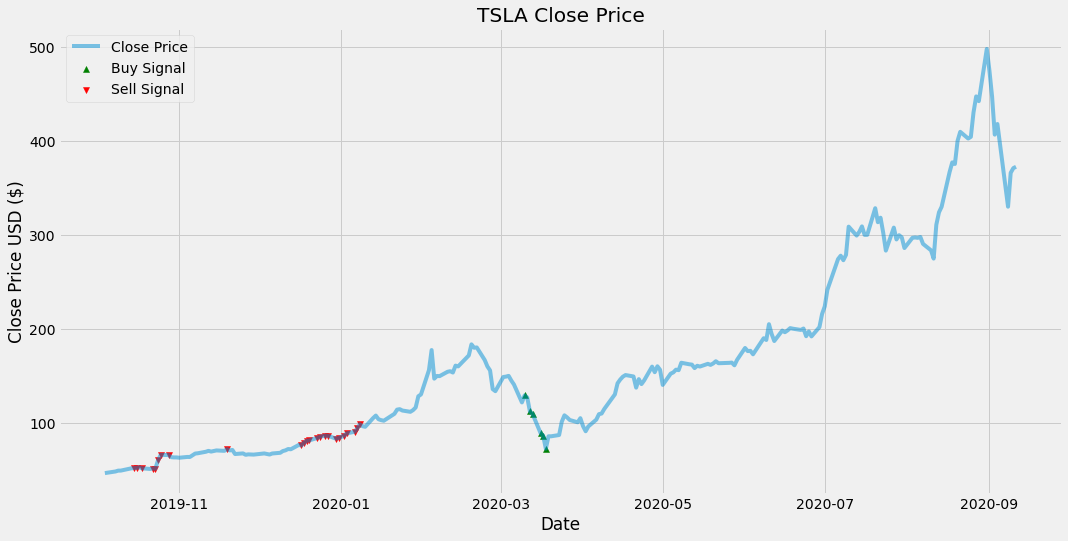

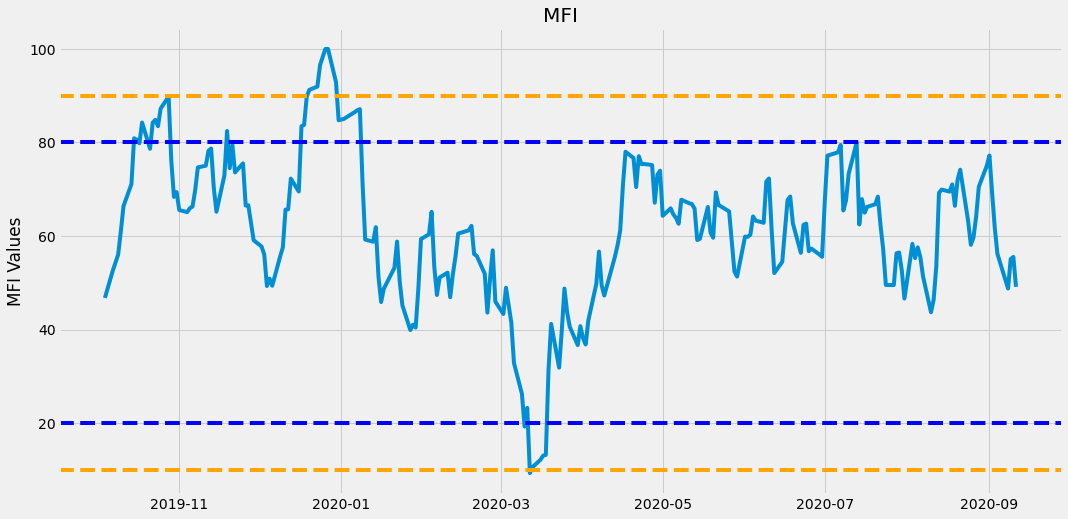

In [24]:
# plot the buy and sell signals
plt.figure(figsize=(16,8))
plt.plot(new_df['Close'], label='Close Price', alpha=0.5)
plt.scatter(new_df.index, new_df['Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(new_df.index, new_df['Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
plt.title('TSLA Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

# Create the plot for MFI to compare
plt.figure(figsize=(16,8))
plt.plot(new_df['MFI'], label='MFI')
plt.axhline(10, linestyle='--', color='orange')
plt.axhline(20, linestyle='--', color='blue')
plt.axhline(80, linestyle='--', color='blue')
plt.axhline(90, linestyle='--', color='orange')
plt.title('MFI')
plt.ylabel('MFI Values')
# plt.legend(df.columns.values, loc='upper left')
plt.show()